## 2.1. Problem Statement: Numpy 


 
### Problem Stat-1
Write a function so that the columns of the output matrix are powers of the input 
 vector. 
 
The order of the powers is determined by the increasing boolean argument. Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1. 
 
 
HINT: Such a matrix with a geometric progression in each row is named for AlexandreTheophile Vandermonde. 

In [2]:
import numpy as np
import pandas as pd
def VanderMonde(lst):
    VanderMtx= []
    for num in lst:
        for j in range(len(lst)):
            VanderMtx.append(num**j)
    Mtx= np.array(VanderMtx) #np.array.reshape(len(lst),len(lst))
    return Mtx.reshape(len(lst),len(lst))

In [3]:
str = [2,3,4,5]
VanderMonde(str)

array([[  1,   2,   4,   8],
       [  1,   3,   9,  27],
       [  1,   4,  16,  64],
       [  1,   5,  25, 125]])

### Problem Statement 2: 
 
Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average of the given sequence is defined as follows: 
 
The moving average sequence has n-k+1 elements as shown below. 
 
The moving averages with k=4 of a ten-value sequence (n=10) is shown below
i 1  2  3  4  5  6  7  8  9 10  
===== == == == == == == == == == ==  
Input 10 20 30 40 50 60 70 80 90 100  
y1      25 = (10+20+30+40)/4  
y2      35 = (20+30+40+50)/4  
y3      45 = (30+40+50+60)/4  
y4      55 = (40+50+60+70)/4 
y5      65 = (50+60+70+80)/4 
y6      75 = (60+70+80+90)/4 
y7      85 = (70+80+90+100)/4 
 
Thus, the moving average sequence has n-k+1=10-4+1=7 values. 

In [9]:
Inp = [10,20, 30, 40, 50, 60, 70, 80, 90, 100]
WindSz = 4
Itr = len(Inp)-WindSz+1
for i in range(Itr):
    Y=0
    for j in range(WindSz):
        Y=Y+Inp[i+j]
    print("Y",i+1, "=",Y/WindSz)

Y 1 = 25.0
Y 2 = 35.0
Y 3 = 45.0
Y 4 = 55.0
Y 5 = 65.0
Y 6 = 75.0
Y 7 = 85.0


### Question: Write a function to find moving average in an array over a window:          
Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3. 

In [11]:
def movAvg(arr,n):
    Itr = len(arr)-n+1
    for i in range(Itr):
        Y=0
        for j in range(n):
            Y=Y+arr[i+j]
        print(Y/n)

In [12]:
str =[3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
movAvg(str,3)

5.0
4.666666666666667
5.666666666666667
6.666666666666667
9.666666666666666
28.666666666666668
49.333333333333336
72.66666666666667
84.0
93.33333333333333
116.33333333333333


## 2.2. Problem Statement: Pandas 

### Problem Statement 1: 
 
#### 1) How-to-count-distance-to-the-previous-zero 
 
For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position 
 
Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]} 
 
The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'. 
 import pandas as pd 
 
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}) 

In [13]:
import numpy as np
import pandas as pd
import random as rand

In [14]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [15]:
t=0
Y=[]
for i in df["X"]:
    if i!=0:
        Y.append(t+1)
        t=t+1
    elif i==0: 
        Y.append(0)
        t=0

In [16]:
df["Y"] = pd.DataFrame({'Y':Y})
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


#### 2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. 

In [17]:
DatetimeIndex = pd.date_range('2015-01-01', '2015-12-31', freq='B')

In [18]:
np.random.seed(100)
BusinessDay = pd.DataFrame(np.random.rand(261,1),columns=['RandmVal'],index=DatetimeIndex)
#BusinessDay.columns=['Dates',0,1,2,3,4,5]
BusinessDay.head(5)

,RandmVal
2015-01-01,0.543405
2015-01-02,0.278369
2015-01-05,0.424518
2015-01-06,0.844776
2015-01-07,0.004719


#### 3) Find the sum of the values in s for every Wednesday

In [19]:
#Find days of week
days = BusinessDay.index.dayofweek
np.random.seed(100)
BusiDayName=pd.DataFrame(np.random.rand(261,1),columns=['RandmVal'])
BusiDayName.index=days  # Assign index as day number
BusiDayName[BusiDayName.index==2].sum()

RandmVal    25.987215
dtype: float64

#### 4)  Average For each calendar month 

In [20]:
#Find months
months = BusinessDay.index.month
months # print day number in workweek, start from Monday as 0
np.random.seed(100)
MonthsNo=pd.DataFrame(np.random.rand(261,1),columns=['RandmVal'])
MonthsNo.index=months  # Assign index as day number
MonthMean = [MonthsNo[MonthsNo.index==val].mean() for val in MonthsNo.index.unique()]
MonthMean
BusinessDay.groupby(pd.Grouper(freq='MS',label='right')).mean()[:12]

,RandmVal
2015-02-01,0.475635
2015-03-01,0.463432
2015-04-01,0.442544
2015-05-01,0.505979
2015-06-01,0.537926
2015-07-01,0.482931
2015-08-01,0.481305
2015-09-01,0.483124
2015-10-01,0.572081
2015-11-01,0.569488


#### 5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred. 

In [21]:
BusinessDay.groupby(pd.Grouper(freq='4MS',label='right')).max()[:3]

,RandmVal
2015-05-01,0.992158
2015-09-01,0.998932
2016-01-01,0.989666


### Problem Statement 2: 
 
Read the dataset from the below link 
 
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv 

In [22]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv'
data_name = pd.read_csv(url)
data_name.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


#### 1) Delete unnamed columns

In [23]:
data_name.drop(["Unnamed: 0"], axis=1,inplace=True)
data_name.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


#### 2) Show the distribution of male and female 

In [24]:
data_name["Gender"].describe()

count     1016395
unique          2
top             F
freq       558846
Name: Gender, dtype: object

#### 3) Show the top 5 most preferred names

In [25]:
data_name.sort_values('Count',ascending=False).head()
Top5Names=np.array(data_name.sort_values('Count',ascending=False).head())
Top5Names[:,1]

array(['Daniel', 'Daniel', 'Daniel', 'Daniel', 'Anthony'], dtype=object)

#### 4) What is the median name occurrence in the dataset 

In [26]:
medLoc= data_name["Count"].median()
data_name.Name[medLoc]

'Elizabeth'

#### 5) Distribution of male and female born count by states 

In [27]:
data_name.State.describe()    #{"Gender","Count","State"}

count     1016395
unique         51
top            CA
freq        76781
Name: State, dtype: object

## 2.3. Problem Statement: Use Cases on Numpy and Pandas 

#### 1) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as: 
##### 1) If the List element is a alphabet or string, the output will be The entry is a 
##### Oops! <class 'ValueError'>occured. Next entry. 

In [30]:
def CrList():
    randomList =[] 
    try:
        mem = int(input("The entry is "))
        #randomList.append(mem)
    except:
        print("Oops! <class 'ValueError'>occured. Next entry")

In [31]:
CrList()

The entry is 'a'
Oops! <class 'ValueError'>occured. Next entry


##### 2) If the List element is “0”,the output will be The entry is 0  Oops! <class ' ZeroDivisionError’>occured. Next entry. 

In [32]:
def CrListt():
    try:
        mem=int(input())
        1/mem
    except:
        print("The entry is ",mem, "Oops! <class 'ZeroDivisionError’>occured. Next entry.")

In [33]:
CrListt()

0
The entry is  0 Oops! <class 'ZeroDivisionError’>occured. Next entry.


##### 3) If the List element is and integer except 0,then output will be The entry is 2 The reciprocal of 2 is 0.5 // reciprocal of an integer 

In [34]:
def CrrList():
    try:
        mem =int(input("The entry is "))
        return 'The reciprocal of {} is {}'.format(mem, 1/mem)   
    except:
        print("Oops! <class 'ZeroDivisionError’>occured. Next entry.")

In [35]:
CrrList()

The entry is 2


'The reciprocal of 2 is 0.5'

#### 2) Array out of Bound Exception Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list size (use try and except) 

In [36]:
try:  
    lst = [1, 2, 3]  
    print(lst[3]) 
except LookupError:  
    print("Array Out of Bound.")

Array Out of Bound.


#### 3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.  Note : The module created as fibo.py has to be placed in lib folder: 
#### For linux/ubuntu path = /home/anaconda/lib/python3 
#### For Windows path = C:\Users\Acadgild\Anaconda3\Lib 

In [37]:
from fibo import fib2 as fib

In [38]:
fib(10)

[1, 1, 2, 3, 5, 8]

#### 4) Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or not and save it as palindrome.py. 

In [45]:
from palindrome import ispalindrome

In [49]:
ispalindrome()

Enter a string'wow'
String is Palindrome


#### 5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. Implement two methods, encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher text can have special characters. Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. Create an instance of this class, encrypt and decrypt back the user entered string.

In [1]:
import numpy as np
from random import randint

In [2]:
class Cipher:
    def __init__(self, messg):
        self.messg= input("Enter a string message: ")
        self.key = list(range(np.random.randint(1,51),51))
        self.wor=''
        self.i=1
        
    def encrypt(self):
        for txt in self.messg:
            if self.i<=len(self.messg):
                num=self.key[self.i]
                #num=str(self.key[self.i])
                num=str(num)
                self.wor+=txt+num
                self.i+=1
        return self.wor
    
    def decrypt(self):
        for txt in self.messg:
            if ((txt>='a' and txt <='z') or (txt>='A' and txt <='Z')):
                self.wor+=txt  
        return self.wor

In [5]:
ltr= Cipher('')
print(ltr.encrypt())

Enter a string message: top secret
t10o11p12 13s14e15c16r17e18t19


In [7]:
ltr= Cipher('')
print(ltr.decrypt())

Enter a string message: T1i2g3e4r5 Z6i7n8d9a 10h11a12i
TigerZindahai


#### 6) Get Data from the following link:  
##### http://files.grouplens.org/datasets/movielens/ml-20m.zip 
##### We will be using the following files for this exercise: 
ratings.csv : userId,movieId,rating, timestamp  
tags.csv : userId,movieId, tag, timestamp  
movies.csv : movieId, title, genres

I. Read the dataset using pandas.  
II. Extract the first row from tags and print its type.  
III.  Extract row 0, 11, 2000 from tags DataFrame. 
V.    Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().  
VI.   Filter out ratings with rating > 5  
VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been  modified. 
VIII. Filter out movies from the movies DataFrame that are of type 'Animation'. 
IX. Find the average rating of movies.  
X. Perform an inner join of movies and tags based on movieId.  
XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4. 
XII. Split 'genres' into multiple columns. 
XIII. Extract year from title e.g. (1995). 
XIV. Select rows based on timestamps later than 2015-02-01. 
XV. Sort the tags DataFrame based on timestamp. 

In [8]:
import os
os.getcwd()

'C:\\Users\\JSM\\Downloads\\DataScience\\Assignmnt\\Sess6_12'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### I Read the dataset using pandas.

In [10]:
moviesCritcRat = pd.read_csv('C:\\Users\\JSM\\Downloads\\DataScience\\25May\\ml-20m\\ratings.csv')
moviesCritcRat.head(3)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819


In [11]:
moviesTags = pd.read_csv('C:\\Users\\JSM\\Downloads\\DataScience\\25May\\ml-20m\\tags.csv')
moviesTags.head(3)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079


In [113]:
moviesIns = pd.read_csv('C:\\Users\\JSM\\Downloads\\DataScience\\25May\\ml-20m\\movies.csv')
moviesIns.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


#### II Extract the first row from tags and print its type.

In [13]:
fs_row = moviesTags.loc[[0],:]
fs_row

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180


In [14]:
type(fs_row)

pandas.core.frame.DataFrame

#### III  Extract row 0, 11, 2000 from tags DataFrame.

In [15]:
moviesTags.loc[[0,11,2000],:]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


#### V Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe(). 

In [16]:
print( moviesCritcRat.describe())

             userId       movieId        rating     timestamp
count  2.000026e+07  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00  1.100918e+09
std    4.003863e+04  1.978948e+04  1.051989e+00  1.621694e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    3.439500e+04  9.020000e+02  3.000000e+00  9.667977e+08
50%    6.914100e+04  2.167000e+03  3.500000e+00  1.103556e+09
75%    1.036370e+05  4.770000e+03  4.000000e+00  1.225642e+09
max    1.384930e+05  1.312620e+05  5.000000e+00  1.427784e+09


#### VI  Filter out ratings with rating > 5

In [17]:
rat5=moviesCritcRat.rating>5
moviesCritcRat.rating.loc[rat5]

Series([], Name: rating, dtype: float64)

#### VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified. 

In [18]:
RatingNull = moviesTags.tag.isnull().values.any() #.values.any()
CriticNull = moviesCritcRat.isnull().values.any()
MoviesNull = moviesIns.isnull().values.any()
print("Null in MoviesRating",RatingNull)
print("Null in MoviesCritic",CriticNull)
print("Null in MoviesIns",MoviesNull)
#moviesCritcRat.isna()

Null in MoviesRating True
Null in MoviesCritic False
Null in MoviesIns False


In [19]:
RatingNa = moviesTags.isna().values.any() #.values.any()
CriticNa = moviesCritcRat.isna().values.any()
MoviesNa = moviesIns.isna().values.any()
print("Null in MoviesRating",RatingNa)
print("Null in MoviesCritic",CriticNa)
print("Null in MoviesIns",MoviesNa)

Null in MoviesRating True
Null in MoviesCritic False
Null in MoviesIns False


In [20]:
SumNull = moviesTags.tag.isnull().sum() #.values.any()
SumNa = moviesTags.tag.isna().sum() #.values.any()
print(SumNull)
print(SumNa)

16
16


#### VIII. Filter out movies from the movies DataFrame that are of type 'Animation'. 

In [21]:
AniMovies = moviesIns.genres=='Animation'
moviesIns.loc[AniMovies].head()

,movieId,title,genres
2503,2588,Cloudland (1998),Animation
4906,5002,Fritz the Cat (1972),Animation
4907,5003,"Nine Lives of Fritz the Cat, The (1974)",Animation
9455,27738,"Cathedral, The (Katedra) (2002)",Animation
9989,32840,Vincent (1982),Animation


#### IX. Find the average rating of movies.

In [22]:
moviesCritcRat.rating.mean()

3.5255285642993797

#### X. Perform an inner join of movies and tags based on movieId.

In [23]:
inn_Join = pd.merge(moviesIns, moviesTags, how='right', on='movieId')
inn_Join.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


#### XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4. 

In [24]:
ComedyMovies = moviesIns.genres=='Comedy'
moviesIns.loc[ComedyMovies].head()

,movieId,title,genres
4,5,Father of the Bride Part II (1995),Comedy
17,18,Four Rooms (1995),Comedy
18,19,Ace Ventura: When Nature Calls (1995),Comedy
64,65,Bio-Dome (1996),Comedy
68,69,Friday (1995),Comedy


#### XII. Split 'genres' into multiple columns. 

In [116]:
newGenres = moviesIns["genres"].str.split("|", n = 4, expand = True)
newGenres.head()

,0,1,2,3,4
0,Adventure,Animation,Children,Comedy,Fantasy
1,Adventure,Children,Fantasy,None,None
2,Comedy,Romance,None,None,None
3,Comedy,Drama,Romance,None,None
4,Comedy,None,None,None,None


#### XIII. Extract year from title e.g. (1995). 

In [26]:
YearsFrMovie = moviesIns.title
YearsFrMovie.str.extract('(\d+)').head()

,0
0,1995
1,1995
2,1995
3,1995
4,1995


#### XIV. Select rows based on timestamps later than 2015-02-01. 

In [27]:
TimeStamp = inn_Join.timestamp >20150201
inn_Join.loc[TimeStamp].head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


#### XV. Sort the tags DataFrame based on timestamp. 

In [28]:
inn_Join.sort_values('timestamp').head()

,movieId,title,genres,userId,tag,timestamp
124798,2788,Monty Python's And Now for Something Completel...,Comedy,100371,monty python,1135429210
88207,1732,"Big Lebowski, The (1998)",Comedy|Crime,100371,coen brothers,1135429236
57979,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,100371,stanley kubrick,1135429248
53696,1193,One Flew Over the Cuckoo's Nest (1975),Drama,100371,jack nicholson,1135429371
183830,5004,"Party, The (1968)",Comedy,100371,peter sellers,1135429399


## 2.4. Problem Statement: Matplotlib 

Matplotlib: 
 
This assignment is for visualization using matplotlib: 
 
data to use: url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 
 
titanic = pd.read_csv(url) 


In [29]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Charts to plot:

#### 1. Create a pie chart presenting the male/female proportion 

In [34]:
Male = titanic.loc[titanic.sex=='male']
Nmale = len(Male)
print(Nmale)
Female = titanic.loc[titanic.sex=='female']
Nfmale = len(Female)
print(Nfmale)

843
466


In [37]:
Pmale = Nmale/(Nmale+Nfmale)*100
Pfmale = Nfmale/(Nmale+Nfmale)*100
print(Pmale)
print(Pfmale)

64.40030557677616
35.59969442322384


([<matplotlib.patches.Wedge at 0x1800a88f9b0>,
 [Text(-0.764967886879411, 1.5739517565806296, 'Male proportion'),
  Text(0.7212555751437824, -1.48401158867578, 'Female proportion')],
 [Text(-0.4371245067882348, 0.8994010037603595, '64.40%'),
  Text(0.3934121318966085, -0.8094608665504253, '35.60%')])

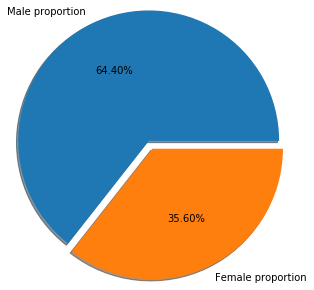

In [45]:
MaleFmale_vals = [Pmale, Pfmale]
MF_labels = ["Male proportion","Female proportion"]
plt.pie(MaleFmale_vals,labels=MF_labels,shadow=True, autopct='%1.2f%%',radius=1.5,explode=[.1,0])

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

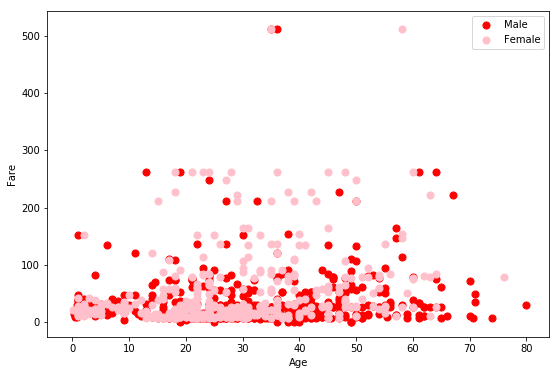

In [51]:
plt.figure(figsize=(9,6))
axis=plt.subplot()
axis.scatter(titanic[titanic.sex=='male']['age'],titanic[titanic.sex=='male']['fare'],c='red',s=50)
axis.scatter(titanic[titanic.sex=='female']['age'],titanic[titanic.sex=='female']['fare'],c='pink',s=50)
axis.set_xlabel('Age')
axis.set_ylabel('Fare')
axis.legend(('Male','Female'))

## 2.5. Problem Statement: Data Cleaning 

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis? 
 
Take this monstrosity as the DataFrame to use in the following puzzles:

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
 
'Budapest_PaRis', 'Brussels_londOn'], 
 
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
 
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
 
'12. Air France', '"Swiss Air"']}) 

In [124]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'], 
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
'Airline': ['KLM(!)', ' (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],(12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


#### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column). 

In [125]:
#FInd Row where value NaN
df.FlightNumber.isna()

0    False
1     True
2    False
3     True
4    False
Name: FlightNumber, dtype: bool

In [126]:
df.FlightNumber.iloc[1] = 10055
df.FlightNumber.iloc[3] = 10075
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],(12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


#### 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [127]:
# new data frame with split value columns
tem_df = pd.DataFrame(df)
new = df["From_To"].str.split("_", n = 1, expand = True)
new.head()

,0,1
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [128]:
tem_df["From"]=new[0]
tem_df["To"]=new[1]
tem_df.head()
#tem_df.drop(columns =["From_To"], inplace = True).head()

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055.0,[],(12),MAdrid,miLAN
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075.0,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air""",Brussels,londOn


#### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".) 

In [129]:
new_name1 = tem_df.From.str.title()
new_name2 = tem_df.To.str.title()
tem_df.From = new_name1
tem_df.To = new_name2
tem_df.head()

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!),London,Paris
1,MAdrid_miLAN,10055.0,[],(12),Madrid,Milan
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,Budapest_PaRis,10075.0,[13],12. Air France,Budapest,Paris
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air""",Brussels,London


#### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions. 

In [130]:
tem_df.drop(columns =["From_To"], inplace = True)

In [131]:
tem_df.head()

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),London,Paris
1,10055.0,[],(12),Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075.0,[13],12. Air France,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London


In [132]:
df.drop(columns =["From_To"], inplace = True)
df.head()

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),London,Paris
1,10055.0,[],(12),Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075.0,[13],12. Air France,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London


#### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [133]:
temp2_df =pd.DataFrame(df)
temp2_df[['delay1','delay2','delay3']] = pd.DataFrame(temp2_df.RecentDelays.values.tolist(), index= temp2_df.index)
temp2_df.head()

,FlightNumber,RecentDelays,Airline,From,To,delay1,delay2,delay3
0,10045.0,"[23, 47]",KLM(!),London,Paris,23.0,47.0,NaN
1,10055.0,[],(12),Madrid,Milan,NaN,NaN,NaN
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075.0,[13],12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London,67.0,32.0,NaN


In [134]:
temp2_df.drop(columns =["RecentDelays"], inplace = True)
temp2_df.head()

,FlightNumber,Airline,From,To,delay1,delay2,delay3
0,10045.0,KLM(!),London,Paris,23.0,47.0,NaN
1,10055.0,(12),Madrid,Milan,NaN,NaN,NaN
2,10065.0,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075.0,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085.0,"""Swiss Air""",Brussels,London,67.0,32.0,NaN


## 2.6. Problem Statement: Pandas SQL 

#### Problem statement 1: 
 
Read the following data set: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ 
 
Rename the columns as per the description from this file: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names 

In [1]:
from pandas import DataFrame, Series
import sqlite3 as db
from pandasql import sqldf

In [2]:
#define the global function, as managing local and global environment might be confusing at times
pysqldf = lambda q: sqldf(q, globals())

In [155]:
adult = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [156]:
sqladb = adult
sqladb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
39                32560 non-null int64
 State-gov        32560 non-null object
 77516            32560 non-null int64
 Bachelors        32560 non-null object
 13               32560 non-null int64
 Never-married    32560 non-null object
 Adm-clerical     32560 non-null object
 Not-in-family    32560 non-null object
 White            32560 non-null object
 Male             32560 non-null object
 2174             32560 non-null int64
 0                32560 non-null int64
 40               32560 non-null int64
 United-States    32560 non-null object
 <=50K            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [158]:
sqladb.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [219]:
sqladb.columns = ['Age','Workclass','fnlwgt','education','educationnum','maritalstatus','Occupation','Relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','>50K<=50K']
sqladb.head()

,Age,Workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,Relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,>50K<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### 1. Select 10 records from the adult sqladb 

In [220]:
pysqldf("SELECT * FROM sqladb LIMIT 10;")

,Age,Workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,Relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,>50K<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


#### 2. Show me the average hours per week of all men who are working in private sector 

In [226]:
print(pysqldf("SELECT Age FROM sqladb WHERE Workclass = 'Private' and sex ='Male':"))

Empty DataFrame
Columns: [Age]
Index: []


In [228]:
print(sqldf("SELECT hoursperweek FROM sqladb WHERE sex ='Male';"))

Empty DataFrame
Columns: [hoursperweek]
Index: []


In [241]:
print(pysqldf("select Workclass, sex, hoursperweek from sqladb group by Workclass,'Private';"))

           Workclass      sex  hoursperweek
0                  ?     Male            60
1        Federal-gov     Male            40
2          Local-gov     Male            40
3       Never-worked     Male            40
4            Private     Male            40
5       Self-emp-inc     Male            60
6   Self-emp-not-inc     Male            13
7          State-gov     Male            40
8        Without-pay   Female            50


#### 3. Show me the frequency table for education, occupation and relationship, separately 

In [252]:
print(pysqldf("SELECT education, COUNT(education)AS Frequency FROM sqladb GROUP BY education ORDER BY COUNT(education) DESC;"))

        education  Frequency
0         HS-grad      10501
1    Some-college       7291
2       Bachelors       5354
3         Masters       1723
4       Assoc-voc       1382
5            11th       1175
6      Assoc-acdm       1067
7            10th        933
8         7th-8th        646
9     Prof-school        576
10            9th        514
11           12th        433
12      Doctorate        413
13        5th-6th        333
14        1st-4th        168
15      Preschool         51


In [253]:
print(pysqldf("SELECT occupation, COUNT(occupation)AS Frequency FROM sqladb GROUP BY occupation ORDER BY COUNT(occupation) DESC;"))

            Occupation  Frequency
0       Prof-specialty       4140
1         Craft-repair       4099
2      Exec-managerial       4066
3         Adm-clerical       3769
4                Sales       3650
5        Other-service       3295
6    Machine-op-inspct       2002
7                    ?       1843
8     Transport-moving       1597
9    Handlers-cleaners       1370
10     Farming-fishing        994
11        Tech-support        928
12     Protective-serv        649
13     Priv-house-serv        149
14        Armed-Forces          9


In [254]:
print(pysqldf("SELECT relationship, COUNT(relationship)AS Frequency FROM sqladb GROUP BY relationship ORDER BY COUNT(relationship) DESC;"))

      Relationship  Frequency
0          Husband      13193
1    Not-in-family       8304
2        Own-child       5068
3        Unmarried       3446
4             Wife       1568
5   Other-relative        981


#### 4. Are there any people who are married, working in private sector and having a master’s degree 

In [246]:
print(pysqldf("select * from sqladb WHERE maritalstatus='married' and Workclass='Private' and education='Masters';"))

Empty DataFrame
Columns: [Age, Workclass, fnlwgt, education, educationnum, maritalstatus, Occupation, Relationship, race, sex, capitalgain, capitalloss, hoursperweek, nativecountry, >50K<=50K]
Index: []


#### 5. What is the average, minimum and maximum age group for people working in different sectors 

In [242]:
print(pysqldf("select Workclass, avg(Age),min(Age), max(Age) from sqladb group by Workclass;"))

           Workclass   avg(Age)  min(Age)  max(Age)
0                  ?  40.960240        17        90
1        Federal-gov  42.590625        17        90
2          Local-gov  41.751075        17        90
3       Never-worked  20.571429        17        30
4            Private  36.797585        17        90
5       Self-emp-inc  46.017025        17        84
6   Self-emp-not-inc  44.969697        17        90
7          State-gov  39.436392        17        81
8        Without-pay  47.785714        19        72


#### 6. Calculate age distribution by country 

In [256]:
print(pysqldf("SELECT Age, COUNT(*) Age FROM sqladb GROUP BY Age ORDER BY Age ASC limit 5;"))


   Age  Age
0   86    1
1   87    1
2   85    3
3   88    3
4   83    6


#### 7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capitalloss' 

In [ ]:
ALTER TABLE Persons
ADD DateOfBirth date;

In [275]:
NetCapitalGain=pysqldf("SELECT capitalgain-capitalloss as NetCapitalGain from sqladb;")
NetCapitalGain.head()

,NetCapitalGain
0,0
1,0
2,0
3,0
4,0


In [274]:
sqladb["NetCapitalGain"] = NetCapitalGain
sqladb.head(10)

,Age,Workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,Relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,>50K<=50K,NetCapitalGain
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,14084
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,5178
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,0


#### Problem statement 2: 

#### Read the following data set: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data 
 
Task: 
 
1. Create an sqlalchemy engine using a sample from the data set 
 

In [1]:
import sqlalchemy
sqlalchemy.__version__

'1.3.1'

In [2]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
base = declarative_base()
from sqlalchemy import Column, Integer, String

In [33]:
adultdata = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
adultdata.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [34]:
adultdata.columns = ['Age','Workclass','fnlwgt','education','educationnum','maritalstatus','Occupation','Relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','>50K<=50K']
adultdata.head()

,Age,Workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,Relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,>50K<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [37]:
engine = create_engine('sqlite:///myFirstdb', echo=True)

In [38]:
adultdata.to_sql('myFirstdb', engine)

2019-06-23 03:37:11,333 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-06-23 03:37:11,335 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 03:37:11,335 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-06-23 03:37:11,335 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 03:37:11,339 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("myFirstdb")
2019-06-23 03:37:11,339 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 03:37:11,343 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "myFirstdb" (
	"index" BIGINT, 
	"Age" BIGINT, 
	"Workclass" TEXT, 
	fnlwgt BIGINT, 
	education TEXT, 
	educationnum BIGINT, 
	maritalstatus TEXT, 
	"Occupation" TEXT, 
	"Relationship" TEXT, 
	race TEXT, 
	sex TEXT, 
	capitalgain BIGINT, 
	capitalloss BIGINT, 
	hoursperweek BIGINT, 
	nativecountry TEXT, 
	">50K<=50K" TEXT
)


2019-06-23 03:37:11,343 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 03:37:11,533

#### 2. Write two basic update queries 

In [39]:
engine.execute('''UPDATE myFirstdb SET education = 'non-Grad' WHERE educationnum <= 9''')
engine.execute('''UPDATE myFirstdb SET Relationship = 'Single' WHERE maritalstatus == ' Divorced' ''')

print(engine.execute('''SELECT * FROM myFirstdb WHERE education = 'non-Grad' and Age<=39''').fetchall())
print(engine.execute('''SELECT * FROM myFirstdb WHERE maritalstatus = 'Divorced' and Age<=39''').fetchall())

2019-06-23 03:37:32,010 INFO sqlalchemy.engine.base.Engine UPDATE myFirstdb SET education = 'non-Grad' WHERE educationnum <= 9
2019-06-23 03:37:32,011 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 03:37:32,658 INFO sqlalchemy.engine.base.Engine COMMIT
2019-06-23 03:37:33,106 INFO sqlalchemy.engine.base.Engine UPDATE myFirstdb SET Relationship = 'Single' WHERE maritalstatus == ' Divorced' 
2019-06-23 03:37:33,107 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 03:37:33,729 INFO sqlalchemy.engine.base.Engine COMMIT
2019-06-23 03:37:34,312 INFO sqlalchemy.engine.base.Engine SELECT * FROM myFirstdb WHERE education = 'non-Grad' and Age<=39
2019-06-23 03:37:34,316 INFO sqlalchemy.engine.base.Engine ()
[(1, 38, ' Private', 215646, 'non-Grad', 9, ' Divorced', ' Handlers-cleaners', 'Single', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K'), (14, 34, ' Private', 245487, 'non-Grad', 4, ' Married-civ-spouse', ' Transport-moving', ' Husband', ' Amer-Indian-Eskimo', ' Male', 0, 0, 45, ' 

2019-06-23 03:37:34,712 INFO sqlalchemy.engine.base.Engine ()
[]


#### 3. Write two delete queries 

In [122]:
engine.execute("DELETE FROM myFirstdb WHERE Age<=39")
engine.execute("DELETE FROM myFirstdb WHERE maritalstatus = ' Never-married'")


2019-06-23 07:41:17,497 INFO sqlalchemy.engine.base.Engine DELETE FROM myFirstdb WHERE Age<=39
2019-06-23 07:41:17,499 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 07:41:17,509 INFO sqlalchemy.engine.base.Engine COMMIT
2019-06-23 07:41:17,511 INFO sqlalchemy.engine.base.Engine DELETE FROM myFirstdb WHERE maritalstatus = ' Never-married'
2019-06-23 07:41:17,512 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 07:41:17,761 INFO sqlalchemy.engine.base.Engine COMMIT


In [125]:
# print results of deleted row, it should empty
print(engine.execute('''SELECT * FROM myFirstdb WHERE Age<=39''').fetchall())
print(engine.execute('''SELECT * FROM myFirstdb WHERE maritalstatus = ' Never-married' ''').fetchall())

2019-06-23 07:42:52,627 INFO sqlalchemy.engine.base.Engine SELECT * FROM myFirstdb WHERE Age<=39
2019-06-23 07:42:52,628 INFO sqlalchemy.engine.base.Engine ()
[]
2019-06-23 07:42:52,660 INFO sqlalchemy.engine.base.Engine SELECT * FROM myFirstdb WHERE maritalstatus = ' Never-married' 
2019-06-23 07:42:52,661 INFO sqlalchemy.engine.base.Engine ()
[]


#### 4. Write two filter queries 

In [145]:
print( engine.execute(" SELECT Age, educationnum, workclass FROM myFirstdb WHERE capitalgain = {capitalgain}".format(capitalgain= 14084)).fetchall())

print( engine.execute(" SELECT Age, educationnum, workclass FROM myFirstdb WHERE hoursperweek = {hoursperweek}".format(hoursperweek= 13)).fetchall())


2019-06-23 07:57:53,050 INFO sqlalchemy.engine.base.Engine  SELECT Age, educationnum, workclass FROM myFirstdb WHERE capitalgain = 14084
2019-06-23 07:57:53,051 INFO sqlalchemy.engine.base.Engine ()
[(55, 13, ' Private'), (52, 10, ' Private'), (51, 13, ' Private'), (58, 13, ' Private'), (48, 15, ' Self-emp-not-inc'), (59, 10, ' Private'), (49, 10, ' Private'), (55, 14, ' Private'), (53, 16, ' Self-emp-inc'), (40, 13, ' Private'), (48, 12, ' ?'), (49, 9, ' Self-emp-not-inc'), (47, 9, ' Private'), (62, 13, ' State-gov'), (51, 9, ' Self-emp-inc'), (63, 10, ' Self-emp-inc'), (58, 7, ' Federal-gov')]
2019-06-23 07:57:53,064 INFO sqlalchemy.engine.base.Engine  SELECT Age, educationnum, workclass FROM myFirstdb WHERE hoursperweek = 13
2019-06-23 07:57:53,065 INFO sqlalchemy.engine.base.Engine ()
[(50, 13, ' Self-emp-not-inc'), (76, 5, ' Private'), (57, 13, ' Self-emp-not-inc'), (84, 9, ' Private'), (71, 5, ' Private'), (66, 9, ' Private'), (76, 9, ' Local-gov'), (48, 15, ' Private'), (75, 10,

#### 5. Write two function queries 

In [3]:
#define function, factorial
def fact(n):
    fa = 1
    for _n in range(n+1):
        if _n>0:
            #fa.append(_n)
            fa = fa*_n
    return fa

In [6]:
engine = create_engine('sqlite:///fact', echo=True)

In [7]:
engine.execute('CREATE TABLE IF NOT EXISTS fact (value INTEGER)')
engine.execute('INSERT INTO fact VALUES (?)', [(str(t),) for t in range(fact(3))])
print(engine.execute("SELECT * FROM fact").fetchall())


2019-06-23 08:32:08,603 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-06-23 08:32:08,605 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 08:32:08,610 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-06-23 08:32:08,612 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 08:32:08,612 INFO sqlalchemy.engine.base.Engine CREATE TABLE IF NOT EXISTS fact (value INTEGER)
2019-06-23 08:32:08,616 INFO sqlalchemy.engine.base.Engine ()
2019-06-23 08:32:08,767 INFO sqlalchemy.engine.base.Engine COMMIT
2019-06-23 08:32:08,776 INFO sqlalchemy.engine.base.Engine INSERT INTO fact VALUES (?)
2019-06-23 08:32:08,777 INFO sqlalchemy.engine.base.Engine [('0',), ('1',), ('2',), ('3',), ('4',), ('5',)]
2019-06-23 08:32:08,788 INFO sqlalchemy.engine.base.Engine COMMIT
2019-06-23 08:32:08,985 INFO sqlalchemy.engine.base.Engine SELECT * FROM fact
2019-06-23 08:32:08,985 INFO sqlalchemy.engine.base.Engine ()
[(

# Thank you!!!